In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

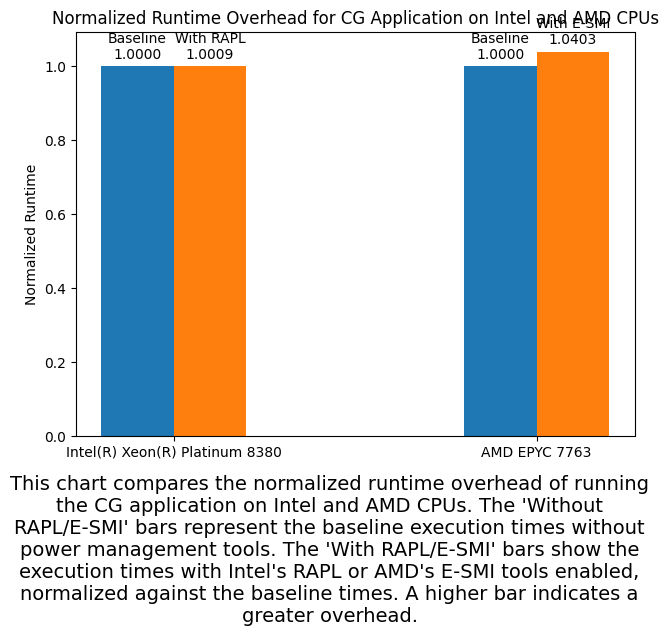

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
intel_times = [10.6, 10.61]  # Intel CPU, with and without RAPL
amd_times = [7.8, 8.114]       # AMD CPU, with and without E-SMI

# Normalize the times (assuming the first value is the baseline for each CPU)
intel_normalized = [time / intel_times[0] for time in intel_times]
amd_normalized = [time / amd_times[0] for time in amd_times]

# Bar labels and positions
labels = ['Intel(R) Xeon(R) Platinum 8380', 'AMD EPYC 7763']
x = np.arange(len(labels))
width = 0.2  # Width of the bars

# Plotting
fig, ax = plt.subplots()

# Bars for Intel and AMD with specific labels
rects1 = ax.bar(x - width/2, [intel_normalized[0], amd_normalized[0]], width)
rects2 = ax.bar(x + width/2, [intel_normalized[1], amd_normalized[1]], width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized Runtime')
ax.set_title('Normalized Runtime Overhead for CG Application on Intel and AMD CPUs with RAPL and E-SMI respectively')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Custom labels for the second bar in each group
# ax.legend(['Baseline', 'With RAPL', 'With E-SMI'], loc='upper left')
description = (
    "This chart compares the normalized runtime overhead of running the CG application "
    "on Intel and AMD CPUs. The 'Without RAPL/E-SMI' bars represent the baseline "
    "execution times without power management tools. The 'With RAPL/E-SMI' bars show "
    "the execution times with Intel's RAPL or AMD's E-SMI tools enabled, normalized "
    "against the baseline times. A higher bar indicates a greater overhead."
)
fig.text(0.5, -0.3, description, wrap=True, horizontalalignment='center', fontsize=14)
# Function to add labels on top of the bars with custom text
def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.annotate(f'{label}\n{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the label function with custom labels
autolabel(rects1, ['Baseline', 'Baseline'])
autolabel(rects2, ['With RAPL', 'With E-SMI'])

# Adjust layout to accommodate the plot
plt.tight_layout()

# Show the plot
plt.show()
